# Energy Production and Consumption in the world
## Is there a link between how a country consume energy and health ?
## How is this behavior over the years ?

In [206]:
# Importing libraries
import matplotlib.pyplot as plt # plotting
import matplotlib
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
from ipywidgets import widgets
import plotly.express as px
import plotly.offline as pyo
import warnings
from matplotlib import pyplot
from scipy import stats
from functools import reduce
import geopandas as gpd
from statsmodels.multivariate.pca import PCA

In [202]:
def standardize(x):
    #This function takes as input a numpy array and returns a stadardized numpy array of the same dimensions.
    #Sample input: np.array([[1,2,3],[4,5,6]])
    #Sample output: np.array([[-1,-1,-1],[1,1,1]])
    
    for i in range(x.shape[1]):
        mean = np.mean(x[:,i])
        std = np.std(x[:,i])
        x[:,i] = (x[:,i] - mean) / std
        
    return x

# Exploratory Analysis

In [2]:
def convert_google_csv_url(url):
    file_id=url.split('/')[-2]
    return 'https://drive.google.com/uc?id=' + file_id

In [269]:
url = 'https://drive.google.com/file/d/1_k46SlB--ARHCLZvFy8RpV3byNhbYIvE/view?usp=sharing'

fossil_fuel_prices = pd.read_csv(convert_google_csv_url(url))
fossil_fuel_prices.dataframeName = 'Fossil Fuel Prices (1989-2019)'
nRow, nCol = fossil_fuel_prices.shape
print(f'There are {nRow} rows and {nCol} columns')
fossil_fuel_prices.head(2)

There are 31 rows and 5 columns


,Year,Crude Oil/US dollars per barrel,Natural Gas (Henry Hub)/US dollars per million Btu,Coal (Northwest Europe Marker Price)/US dollars per tonne,Unnamed: 4
0,1989,18.23,1.70,42.08,NaN
1,1990,23.73,1.64,43.48,NaN


In [3]:
url='https://drive.google.com/file/d/1HIFzmxgYgewmjC7b_85cfeYY0MUZ2pgT/view?usp=sharing'

energy_consumption_by_country = pd.read_csv(convert_google_csv_url(url))
energy_consumption_by_country.dataframeName = 'Percentage of Energy Consumption by Country.csv'
nRow, nCol = energy_consumption_by_country.shape
print(f'There are {nRow} rows and {nCol} columns')
energy_consumption_by_country.head(2)

There are 5190 rows and 11 columns


,Entity,Code,Year,Coal Consumption - EJ,Gas Consumption - EJ,Geo Biomass Other - TWh,Hydro Generation - TWh,Nuclear Generation - TWh,Solar Generation - TWh,Wind Generation -TWh,Oil Consumption - EJ
0,Africa,NaN,1965,1.164586,0.034358,0.0,13.905635,0.0,0.0,0.0,1.173241
1,Africa,NaN,1966,1.163240,0.038412,0.0,15.510004,0.0,0.0,0.0,1.284154


In [4]:
energy_consumption_by_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Entity                    5190 non-null   object 
 1   Code                      4145 non-null   object 
 2   Year                      5190 non-null   int64  
 3   Coal Consumption - EJ     5170 non-null   float64
 4   Gas Consumption - EJ      5170 non-null   float64
 5   Geo Biomass Other - TWh   5115 non-null   float64
 6   Hydro Generation - TWh    5170 non-null   float64
 7   Nuclear Generation - TWh  5170 non-null   float64
 8   Solar Generation - TWh    5170 non-null   float64
 9   Wind Generation -TWh      5170 non-null   float64
 10  Oil Consumption - EJ      5184 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 446.1+ KB


In [5]:
energy_cleaned = energy_consumption_by_country[energy_consumption_by_country.Year.between(2010,2020)].drop('Code', axis=1).dropna()
energy_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 45 to 5189
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Entity                    980 non-null    object 
 1   Year                      980 non-null    int64  
 2   Coal Consumption - EJ     980 non-null    float64
 3   Gas Consumption - EJ      980 non-null    float64
 4   Geo Biomass Other - TWh   980 non-null    float64
 5   Hydro Generation - TWh    980 non-null    float64
 6   Nuclear Generation - TWh  980 non-null    float64
 7   Solar Generation - TWh    980 non-null    float64
 8   Wind Generation -TWh      980 non-null    float64
 9   Oil Consumption - EJ      980 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 84.2+ KB


In [6]:
url = 'https://drive.google.com/file/d/1kcIWPZGEnNTVjE35jyxRlEUhqPdjRfMp/view?usp=sharing'
co2_by_country = pd.read_csv(convert_google_csv_url(url))
co2_by_country.dataframeName = 'CO2 emissions by country.csv'
nRow, nCol = co2_by_country.shape
print(f'There are {nRow} rows and {nCol} columns')
co2_by_country.head(2)

There are 23372 rows and 4 columns


,Entity,Code,Year,Annual CO2 emissions
0,Afghanistan,AFG,1949,0.014656
1,Afghanistan,AFG,1950,0.084272


In [7]:
co2_by_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23372 entries, 0 to 23371
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                23372 non-null  object 
 1   Code                  19244 non-null  object 
 2   Year                  23372 non-null  int64  
 3   Annual CO2 emissions  23372 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 730.5+ KB


In [8]:
co2_cleaned = co2_by_country[co2_by_country.Year.between(2010,2020)].drop('Code', axis=1).dropna()
co2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2139 entries, 61 to 23371
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                2139 non-null   object 
 1   Year                  2139 non-null   int64  
 2   Annual CO2 emissions  2139 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 66.8+ KB


In [9]:
url = 'https://drive.google.com/file/d/1CYkacxACEAGbBVy6CJZI9obIl0rt2suE/view?usp=sharing'
pollution_by_region = pd.read_csv(convert_google_csv_url(url))
pollution_by_region.dataframeName = 'Pollution emissions by region.csv'
nRow, nCol = pollution_by_region.shape
print(f'There are {nRow} rows and {nCol} columns')
pollution_by_region.head(2)

There are 10608 rows and 19 columns


,TL,Territory level and Typology,REG_ID,Region,VAR,Indicator,POS,Position,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,1,Country,AUS,Australia,AIR_POL,Air Pollution in PM2.5 (average level in µg/m³...,ALL,All regions,2003,2003,NaN,NaN,0,Units,NaN,NaN,3.880,NaN,NaN
1,1,Country,AUS,Australia,AIR_POL,Air Pollution in PM2.5 (average level in µg/m³...,ALL,All regions,2006,2006,NaN,NaN,0,Units,NaN,NaN,3.301,NaN,NaN


In [10]:
pollution_by_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10608 entries, 0 to 10607
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TL                            10608 non-null  int64  
 1   Territory level and Typology  10608 non-null  object 
 2   REG_ID                        10608 non-null  object 
 3   Region                        10608 non-null  object 
 4   VAR                           10608 non-null  object 
 5   Indicator                     10608 non-null  object 
 6   POS                           10608 non-null  object 
 7   Position                      10608 non-null  object 
 8   TIME                          10608 non-null  int64  
 9   Year                          10608 non-null  int64  
 10  Unit Code                     0 non-null      float64
 11  Unit                          0 non-null      float64
 12  PowerCode Code                10608 non-null  int64  
 13  P

In [11]:
url = 'https://drive.google.com/file/d/1YbQap_5e4vqKvCCWU8iB6tOByNttcNe2/view?usp=sharing'
deaths_by_particle_vs_pm25 = pd.read_csv(convert_google_csv_url(url))
deaths_by_particle_vs_pm25.dataframeName = 'Deaths by Particulate Matter Air Pollution vs PM25 by country.csv'
nRow, nCol = deaths_by_particle_vs_pm25.shape
print(f'There are {nRow} rows and {nCol} columns')
deaths_by_particle_vs_pm25.head(2)

There are 48331 rows and 7 columns


,Entity,Code,Year,"Total population (Gapminder, HYDE & UN)",Continent,"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",Deaths - Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate)
0,Abkhazia,OWID_ABK,2015,NaN,Asia,NaN,NaN
1,Afghanistan,AFG,1800,3280000.0,NaN,NaN,NaN


In [12]:
deaths_by_particle_vs_pm25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48331 entries, 0 to 48330
Data columns (total 7 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Entity                                                                                    48331 non-null  object 
 1   Code                                                                                      46132 non-null  object 
 2   Year                                                                                      48331 non-null  int64  
 3   Total population (Gapminder, HYDE & UN)                                                   46883 non-null  float64
 4   Continent                                                                                 285 non-null    object 
 5   PM2.5 air pollution, mean annual exposure (micrograms 

In [13]:
deathspm25_cleaned = deaths_by_particle_vs_pm25[deaths_by_particle_vs_pm25.Year.between(2010,2020)].drop(['Code','Continent'], axis=1)
deathspm25_cleaned

,Entity,Year,"Total population (Gapminder, HYDE & UN)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",Deaths - Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate)
0,Abkhazia,2015,NaN,NaN,NaN
211,Afghanistan,2010,29186000.0,46.536809,46.733269
212,Afghanistan,2011,30117000.0,50.483960,48.290188
213,Afghanistan,2012,31161000.0,50.653945,48.148226
214,Afghanistan,2013,32270000.0,50.968831,46.376090
...,...,...,...,...,...
48326,Zimbabwe,2016,14030000.0,24.513035,25.643570
48327,Zimbabwe,2017,14237000.0,NaN,26.166182
48328,Zimbabwe,2018,14439000.0,NaN,NaN
48329,Zimbabwe,2019,14645000.0,NaN,NaN


In [14]:
url = 'https://drive.google.com/file/d/1Qz92NhY8A2ILvTbMgYgTQQparjeE9ZPk/view?usp=sharing'
green_indicators = pd.read_csv(convert_google_csv_url(url))
green_indicators.dataframeName = 'Green Growth Indicators by country.csv'
nRow, nCol = green_indicators.shape
print(f'There are {nRow} rows and {nCol} columns')
green_indicators.head(2)

There are 160569 rows and 15 columns


,COU,Country,VAR,Variable,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,CO2_PBPROD,"Production-based CO2 productivity, GDP per uni...",1990,1990,USD_KG,US dollars per kilogram,0,Units,2015,2015,1.964258,NaN,NaN
1,AUS,Australia,CO2_PBPROD,"Production-based CO2 productivity, GDP per uni...",1995,1995,USD_KG,US dollars per kilogram,0,Units,2015,2015,2.094627,NaN,NaN


In [15]:
green_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160569 entries, 0 to 160568
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   COU                    160569 non-null  object 
 1   Country                160569 non-null  object 
 2   VAR                    160569 non-null  object 
 3   Variable               160569 non-null  object 
 4   YEA                    160569 non-null  int64  
 5   Year                   160569 non-null  int64  
 6   Unit Code              160569 non-null  object 
 7   Unit                   160569 non-null  object 
 8   PowerCode Code         160569 non-null  int64  
 9   PowerCode              160569 non-null  object 
 10  Reference Period Code  22554 non-null   object 
 11  Reference Period       22554 non-null   object 
 12  Value                  160568 non-null  float64
 13  Flag Codes             26212 non-null   object 
 14  Flags                  26212 non-nul

In [277]:
green_indic_cleaned = green_indicators[green_indicators.Year.between(2010,2020)].drop(['COU','Reference Period Code', 'Unit Code', 'VAR',
                                             'Reference Period', 'Flag Codes', 'Flags', 'YEA', 'PowerCode', 'PowerCode Code','Unit'],axis=1).dropna()
green_indic_cleaned = green_indic_cleaned[green_indic_cleaned.Variable == 'Renewable electricity, % total electricity generation'].drop('Variable',axis=1)
green_indic_cleaned.columns = ['Entity','Year','%RenewableElectricity']
green_indic_cleaned.head()

,Entity,Year,%RenewableElectricity
69,Australia,2010,8.598495
70,Australia,2011,10.355690
71,Australia,2012,10.492490
72,Australia,2013,13.122810
73,Australia,2014,14.598490


# For our anaylze we link every pertinent numeric data into one dataframe

In [152]:
energy_co2 = pd.merge(energy_cleaned, co2_cleaned,  how='left', left_on=['Entity','Year'], right_on = ['Entity','Year'])
energy_co2_death = pd.merge(energy_co2, deathspm25_cleaned,  how='left', left_on=['Entity','Year'], right_on = ['Entity','Year'])
energy_co2_death_green = pd.merge(energy_co2_death, green_indic_cleaned,  how='left', left_on=['Entity','Year'], right_on = ['Entity','Year'])
energy_co2_death_green.columns = ['Country', 'Year', 'Coal', 'Gas', 'Biomass','Hydro','Nuclear','Solar','Wind','Oil','CO2',
                                  'Population','PM2.5','Deaths','%RenewableElectricity']
energy_co2_death_green.shape

(980, 15)

In [19]:
energy_co2_death_green.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 0 to 979
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                980 non-null    object 
 1   Year                   980 non-null    int64  
 2   Coal                   980 non-null    float64
 3   Gas                    980 non-null    float64
 4   Biomass                980 non-null    float64
 5   Hydro                  980 non-null    float64
 6   Nuclear                980 non-null    float64
 7   Solar                  980 non-null    float64
 8   Wind                   980 non-null    float64
 9   Oil                    980 non-null    float64
 10  CO2                    747 non-null    float64
 11  Population             830 non-null    float64
 12  PM2.5                  553 non-null    float64
 13  Deaths                 640 non-null    float64
 14  %RenewableElectricity  636 non-null    float64
dtypes: flo

In [55]:
energy_co2_death_green.head(10)

,Country,Year,Coal,Gas,Biomass,Hydro,Nuclear,Solar,Wind,Oil,CO2,Population,PM2.5,Deaths,%RenewableElectricity
0,Africa,2010,4.190915,3.561004,3.829542,107.426833,13.527000,0.213821,2.284182,7.127722,1220.494175,1.039304e+09,NaN,NaN,NaN
1,Africa,2011,4.120680,3.859500,3.929657,110.444821,12.902000,0.452785,2.537473,6.934442,1250.925424,1.066410e+09,NaN,NaN,NaN
2,Africa,2012,4.017909,4.143867,4.089950,110.952300,12.967434,0.551142,2.961731,7.311970,1260.971595,1.094343e+09,NaN,NaN,NaN
3,Africa,2013,4.070297,4.198677,4.438768,117.672846,14.105998,0.824348,3.559784,7.573096,1277.276337,1.123045e+09,NaN,NaN,NaN
4,Africa,2014,4.264064,4.316121,5.552723,123.726795,13.794000,1.831308,5.158122,7.699942,1365.297815,1.152434e+09,NaN,NaN,NaN
5,Africa,2015,4.026683,4.624571,7.135987,119.856820,12.237000,3.595710,8.888286,7.874370,1330.236714,1.182439e+09,NaN,NaN,NaN
6,Africa,2016,4.273703,4.752819,7.206840,115.801250,15.913439,4.939310,11.305821,7.945153,1354.960916,1.213041e+09,NaN,NaN,NaN
7,Africa,2017,4.257177,5.043190,7.571013,123.815625,15.756337,6.984051,12.458179,7.990910,1370.140327,1.244222e+09,NaN,NaN,NaN
8,Africa,2018,4.405360,5.357267,8.059533,130.387840,11.090427,9.850223,14.287795,8.074046,1400.841210,1.275921e+09,NaN,NaN,NaN
9,Africa,2019,4.472387,5.404601,8.184247,132.734791,14.214193,19.377978,17.508053,8.278640,NaN,1.308064e+09,NaN,NaN,NaN


# Is there a link between Deaths and PM2.5 Air pollution ? Let's check with a ttest_ind

In [22]:
stats.ttest_ind(deathspm25_cleaned['Deaths - Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate)'].dropna(), deathspm25_cleaned['PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'].dropna())
# pvalue > 5% So we can not reject the independance of PM2.5 and Deaths variables
# I used full database with more values to get a more accurate result

Ttest_indResult(statistic=0.4816112333761088, pvalue=0.6301120330029324)

# I think the more PM2.5 we have the more Deaths we have.
# I think over the years Solar, Wind and Biomass have increased
## Let's find correlations between all these values

In [153]:
corr = energy_co2_death_green.corr()
corr.style.background_gradient(cmap='coolwarm')

,Year,Coal,Gas,Biomass,Hydro,Nuclear,Solar,Wind,Oil,CO2,Population,PM2.5,Deaths,%RenewableElectricity
Year,1.000000,0.000609,0.018875,0.045487,0.017537,0.003125,0.147613,0.098939,0.010135,0.004287,0.007162,0.045436,-0.091123,0.105693
Coal,0.000609,1.000000,0.817737,0.843798,0.926603,0.771121,0.719154,0.815850,0.900236,0.971422,0.943768,0.100139,0.073129,-0.045250
Gas,0.018875,0.817737,1.000000,0.932745,0.928064,0.948380,0.749529,0.885211,0.976845,0.968893,0.928726,0.046253,0.016982,-0.061771
Biomass,0.045487,0.843798,0.932745,1.000000,0.950906,0.932690,0.847641,0.954129,0.958810,0.952142,0.917697,0.015910,-0.032999,0.000764
Hydro,0.017537,0.926603,0.928064,0.950906,1.000000,0.884662,0.780431,0.897880,0.966855,0.986187,0.960399,0.048848,0.012719,0.039205
Nuclear,0.003125,0.771121,0.948380,0.932690,0.884662,1.000000,0.725778,0.887520,0.941524,0.928920,0.859327,-0.012629,-0.052193,-0.050297
Solar,0.147613,0.719154,0.749529,0.847641,0.780431,0.725778,1.000000,0.937592,0.771312,0.787337,0.753462,0.025165,-0.029540,-0.027837
Wind,0.098939,0.815850,0.885211,0.954129,0.897880,0.887520,0.937592,1.000000,0.905171,0.911425,0.852089,0.027192,-0.023246,-0.018055
Oil,0.010135,0.900236,0.976845,0.958810,0.966855,0.941524,0.771312,0.905171,1.000000,0.987048,0.951731,0.056371,0.006837,-0.047058
CO2,0.004287,0.971422,0.968893,0.952142,0.986187,0.928920,0.787337,0.911425,0.987048,1.000000,0.965910,0.075674,0.040866,-0.047762


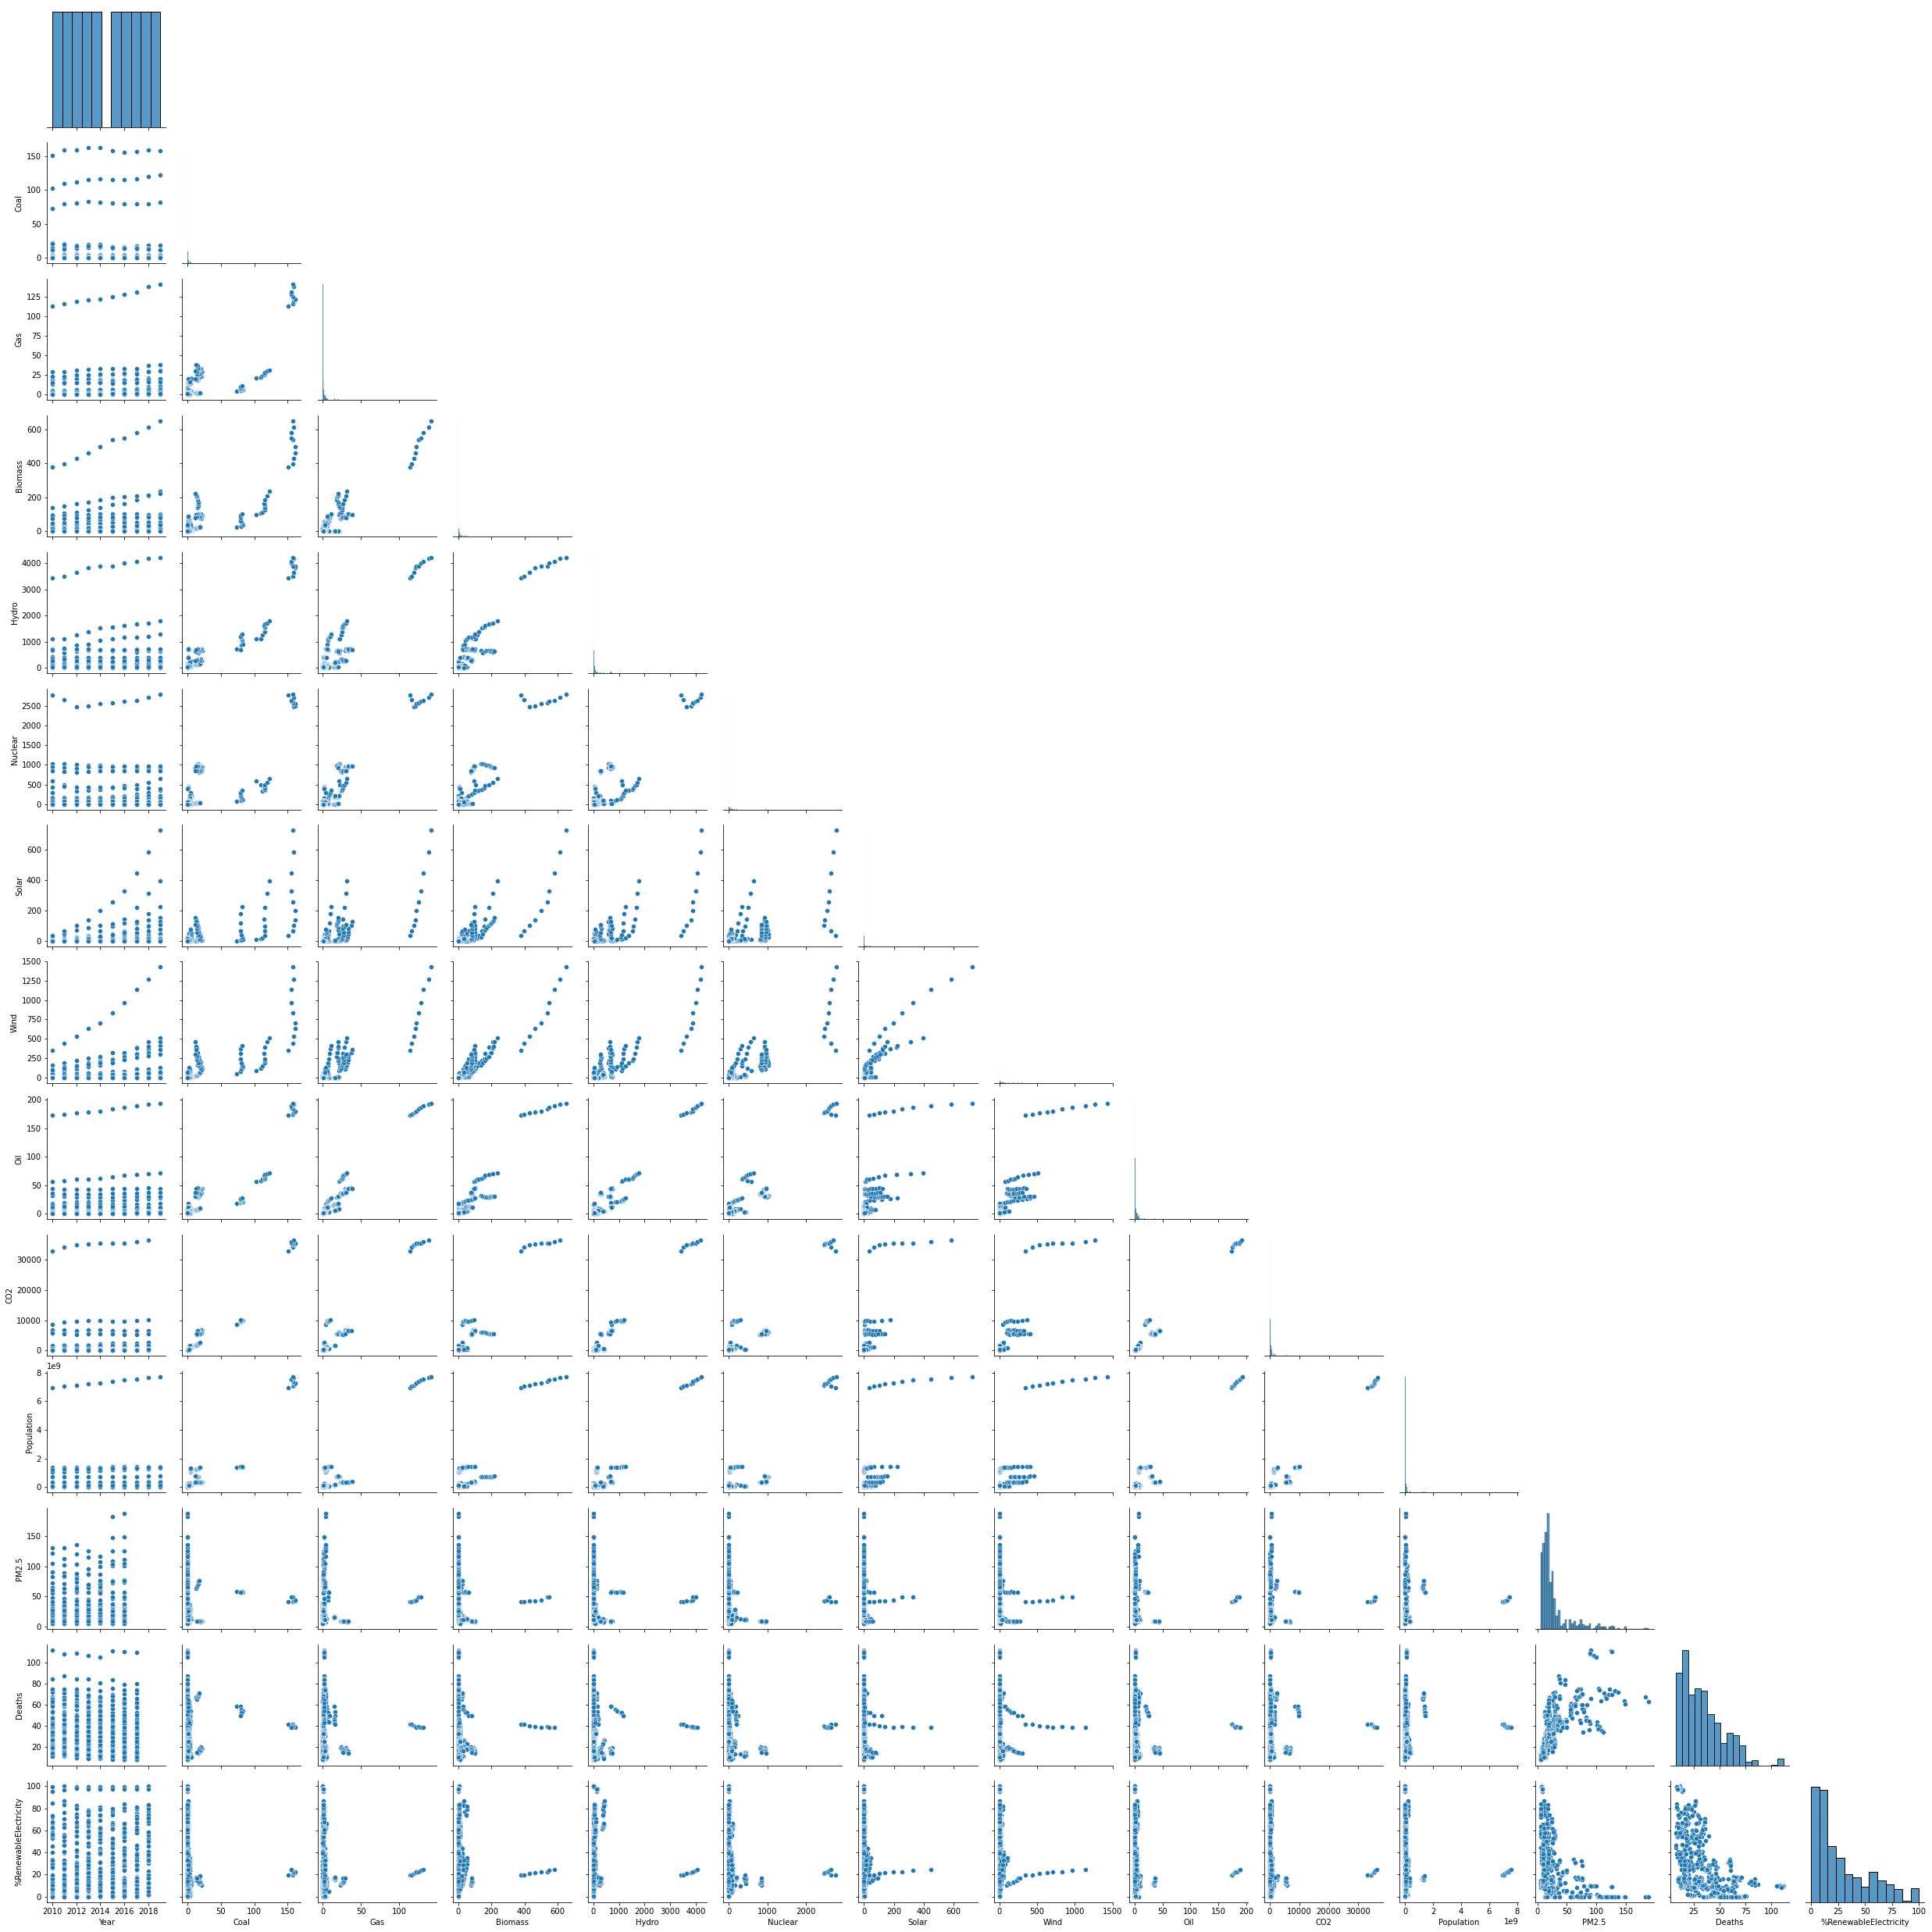

In [24]:
ax = sns.pairplot(energy_co2_death_green, corner=True)

# Geopandas :
## Visualize coal consumption worldwide

In [158]:
clean_country = energy_co2_death_green.copy()
clean_country.Country.loc[clean_country.Country.str.contains('Europe')] = "Europe"
clean_country.Country.loc[clean_country['Country'].str.contains('Africa', case=True)] = "Africa"
clean_country.Country.loc[(clean_country['Country'].str.contains('America')) & (clean_country['Country'].str.contains('South'))] = "South America"
clean_country.Country.loc[(clean_country['Country'].str.contains('America')) & (clean_country['Country'].str.contains('Central'))] = "North America"

/home/osboxes/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [161]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
energy_by_country_mean = clean_country.groupby('Country').mean()['Coal']
world_map = pd.merge(countries, energy_by_country_mean,  how='left', left_on=['continent'], right_on = ['Country'])
world_map

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Coal
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",1.366384
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",1.366384
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",8.833089
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",8.833089
...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",7.488550
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",7.488550
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",7.488550
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",8.833089


<AxesSubplot:>

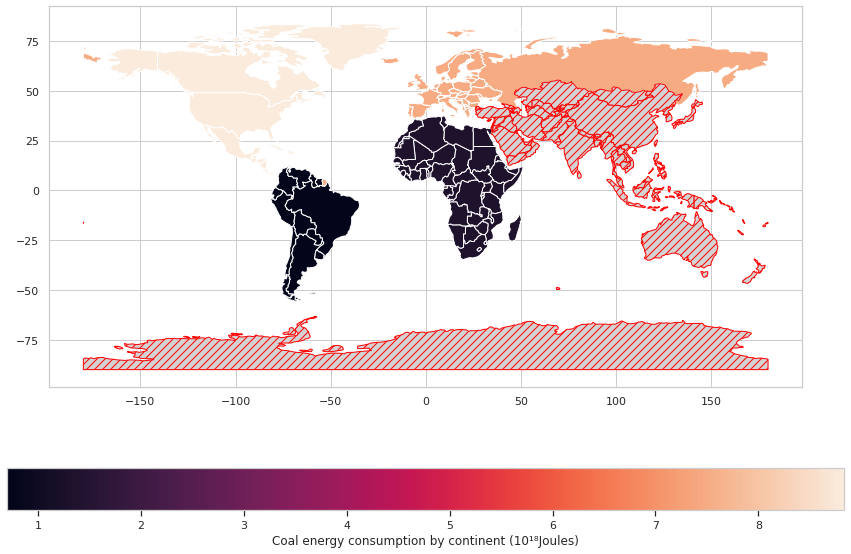

In [164]:
world_map.plot(column='Coal', legend=True, legend_kwds={'label': "Coal energy consumption by continent (10¹⁸Joules)", 'orientation': "horizontal"}, 
               missing_kwds={ "color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Missing values",}, figsize=(15, 10),)

# Visualize energy consumption and energy production 

In [25]:
#Remove the world first line to get comprehensive data
energy_grouped = energy_co2_death_green.groupby(['Country']).mean().sort_values(by='Coal', ascending=False).iloc[1:].drop(['Year'], axis=1)
energy_grouped.describe()

,Coal,Gas,Biomass,Hydro,Nuclear,Solar,Wind,Oil,CO2,Population,PM2.5,Deaths,%RenewableElectricity
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,82.000000,8.200000e+01,78.000000,79.000000,72.000000
mean,3.254890,2.591925,10.536409,79.694082,54.128021,5.928202,17.102061,3.761448,569.524938,1.007051e+08,28.068272,33.571778,26.917775
std,14.289989,5.950045,28.553973,216.894981,172.206953,18.971040,53.612043,9.331893,1527.818505,2.556304e+08,27.626477,20.135243,25.648881
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035847,3.534221,3.297000e+05,5.391961,9.141243,0.000000
25%,0.033946,0.147199,0.095191,1.880824,0.000000,0.040333,0.044234,0.393626,45.829041,6.047725e+06,12.793364,17.755958,9.223999
50%,0.169420,0.598940,0.718307,13.175123,0.000000,0.335462,0.676663,0.805876,101.618631,2.216615e+07,18.516193,30.139523,15.805957
75%,0.738032,1.630479,5.999826,39.890692,15.678088,1.969107,5.682896,2.642925,367.145652,6.524380e+07,27.853889,44.891238,41.377170
max,114.366412,33.044537,184.214017,1473.997665,974.460635,129.646415,295.787467,63.921412,9607.101765,1.402420e+09,144.272121,108.833189,99.983584


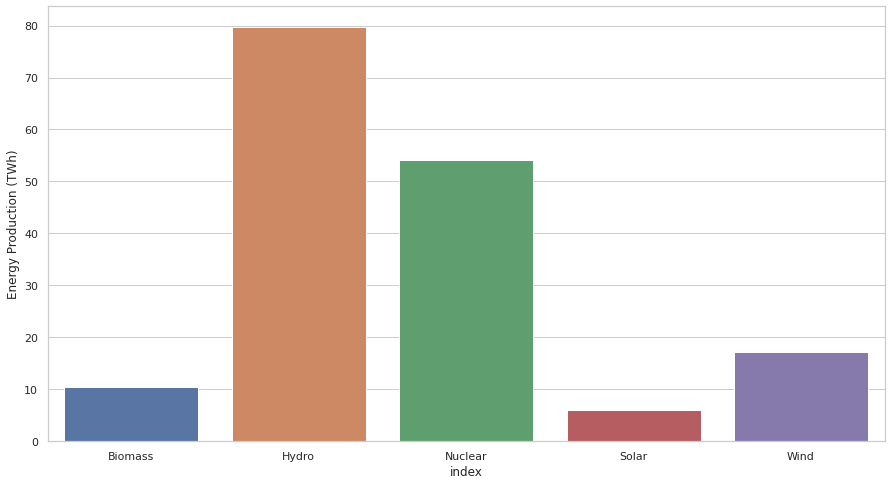

In [199]:
fig, ax = pyplot.subplots(figsize=(15,8))
ploted_data = energy_grouped.describe()[['Biomass','Hydro','Nuclear','Solar','Wind',]].T.reset_index()
ploted_data = ploted_data.rename(columns={'mean': 'Energy Production (TWh)'})
ax = sns.barplot(x='index' ,y='Energy Production (TWh)', data=ploted_data)

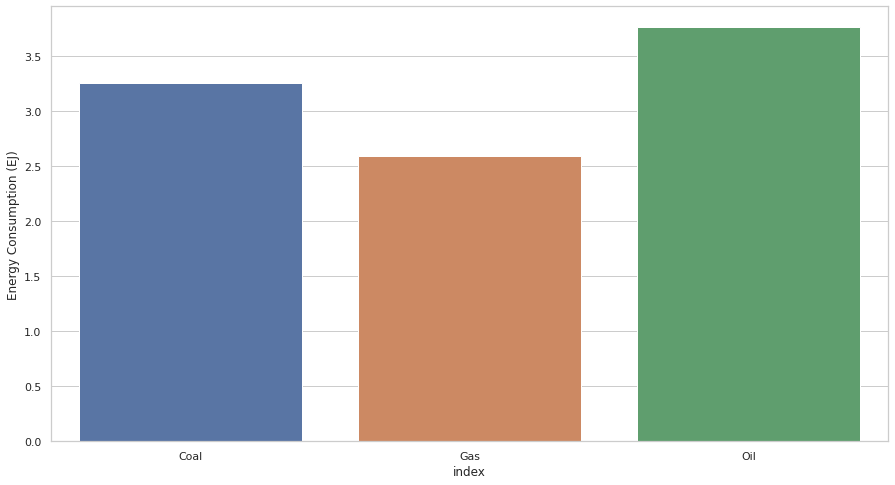

In [197]:
fig, ax = pyplot.subplots(figsize=(15,8))
ploted_data = energy_grouped.describe()[['Coal','Gas','Oil']].T.reset_index()
ploted_data = ploted_data.rename(columns={'mean': 'Energy Consumption (EJ)'})
ax = sns.barplot(x='index' ,y='Energy Consumption (EJ)', data=ploted_data)

[Text(0.5, 0, 'Nuclear Production (TWh)')]

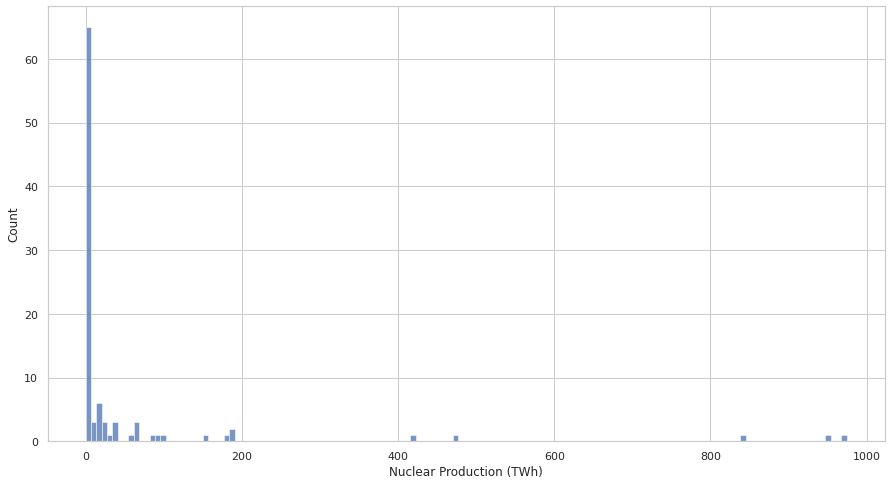

In [281]:
fig, ax = pyplot.subplots(figsize=(15,8))
ax = sns.histplot(data=energy_grouped, x="Nuclear")
ax.set(xlabel='Nuclear Production (TWh)')

# Checking data with PCA

In [276]:
energy_grouped.dropna()

,Coal,Gas,Biomass,Hydro,Nuclear,Solar,Wind,Oil,CO2,Population,PM2.5,Deaths,%RenewableElectricity
Country,,,,,,,,,,,,,
United States,16.245790,26.363044,80.212088,273.739675,839.684376,43.761552,196.957592,35.621870,5461.793278,3.194853e+08,8.762900,17.251029,13.513279
India,15.776426,1.953263,22.571114,132.619814,35.427257,13.364695,38.674815,8.358435,2162.834966,1.301920e+09,69.498011,67.888845,16.964330
Japan,4.947174,4.173901,24.095061,80.313774,65.389483,32.668695,5.682896,8.370389,1238.399212,1.279261e+08,12.527511,11.607929,12.759473
Russia,3.766812,15.460134,0.512233,177.032074,188.294771,0.313362,0.110254,6.311351,1643.770167,1.447562e+08,15.915772,47.846908,16.503466
South Africa,3.740892,0.155414,0.433767,1.201646,13.650783,2.205522,2.818787,1.148033,468.384386,5.492400e+07,31.195606,49.264472,2.092580
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Qatar,0.000000,1.320219,0.103360,0.000000,0.000000,0.005241,0.000000,0.451017,95.210187,2.444300e+06,124.850281,66.296134,0.000000
Turkmenistan,0.000000,0.851130,0.000000,0.003154,0.000000,0.003964,0.000000,0.275739,67.961836,5.513900e+06,31.256462,68.257641,0.000000
Trinidad and Tobago,0.000000,0.691698,0.000000,0.000000,0.000000,0.004530,0.000000,0.091010,45.471948,1.364200e+06,13.956852,50.371206,0.041435


In [237]:
from sklearn.decomposition import PCA
standardize_energy = standardize(np.array(energy_grouped.dropna()))
pca = PCA()
pca.fit(standardize_energy)
se_pca = pca.transform(standardize_energy)

In [248]:
se_pca.shape

(72, 13)

Text(0.5, 1.0, 'Variable factor map')

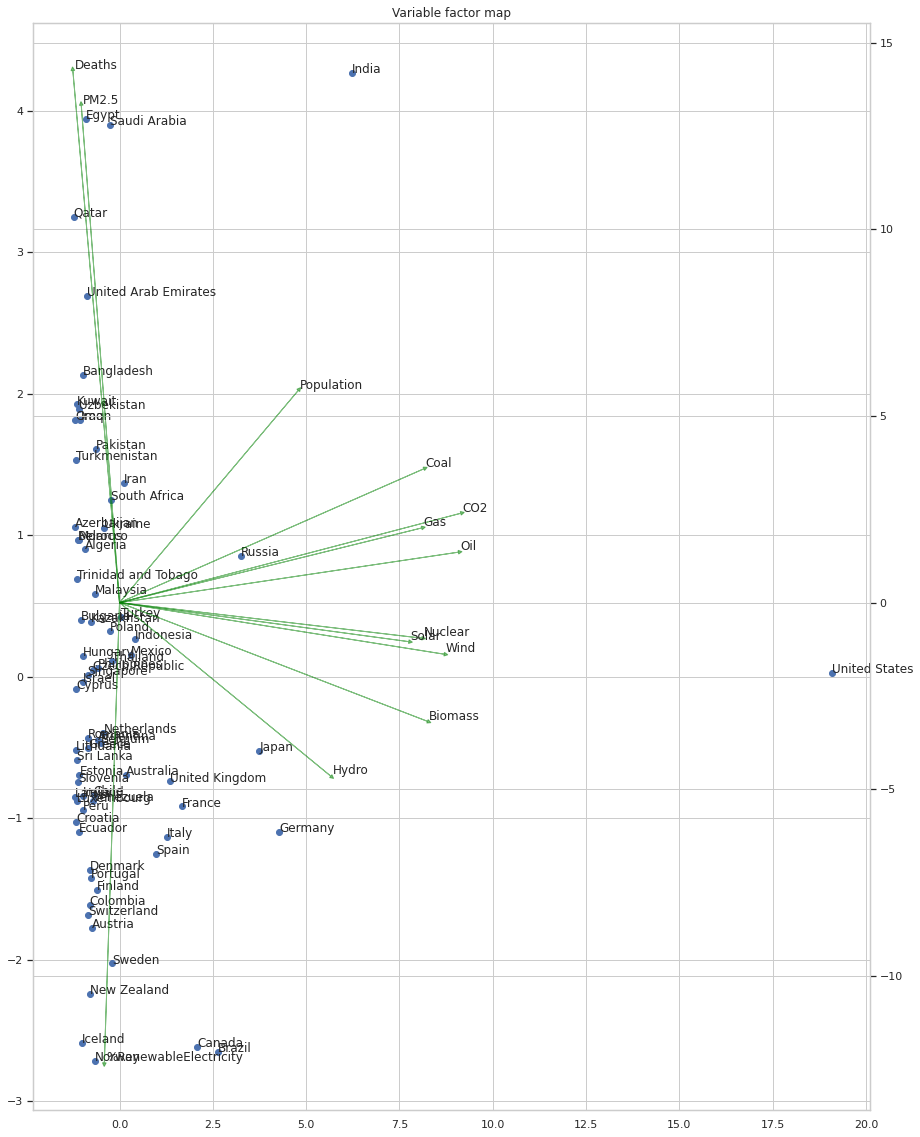

In [263]:
countries = energy_grouped.dropna().reset_index().Country

fig, ax = plt.subplots(figsize=(15,20))
ax.scatter(se_pca[:,0],se_pca[:,1])

for i, country in enumerate(countries):
    ax.annotate(country, (se_pca[i,0],se_pca[i,1]))


ax2 = ax.twinx()

for i in range(0, len(pca.components_)):
    ax2.arrow(0, 0,  # Start the arrow at the origin
             pca.components_[0, i]*25, pca.components_[1, i]*25,  # 0 and 1 correspond to dimension 1 and 2
             head_width=0.1,head_length=0.1, color='green', alpha=0.5)
    ax2.text((pca.components_[0, i])*25 + 0.05, (pca.components_[1, i])*25 + 0.05, energy_grouped.dropna().columns.values[i])
    
an = np.linspace(0, 2 * np.pi, 100)  # Add a unit circle for scale
ax2.axis('equal')
ax2.set_title('Variable factor map')

# Check which Entity is consuming most Coal and Gas

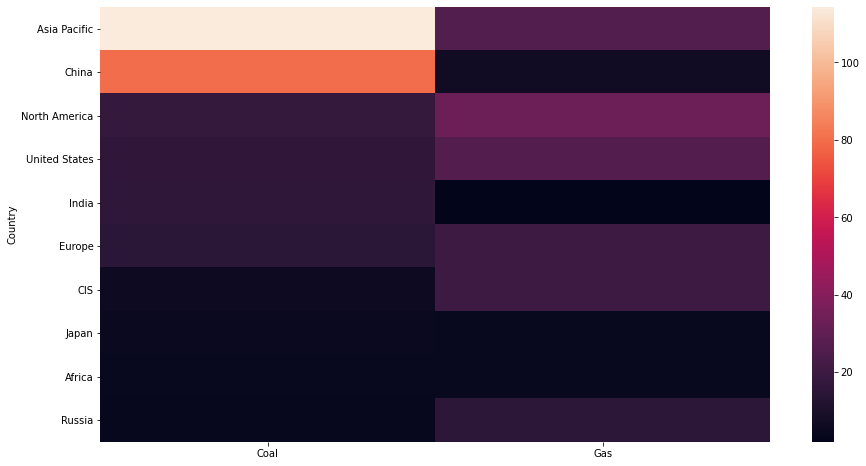

In [28]:
fig, ax = pyplot.subplots(figsize=(15,8))
ax = sns.heatmap(energy_grouped.iloc[:,0:2].head(10))

# Check which Entity is producing energy and which kind

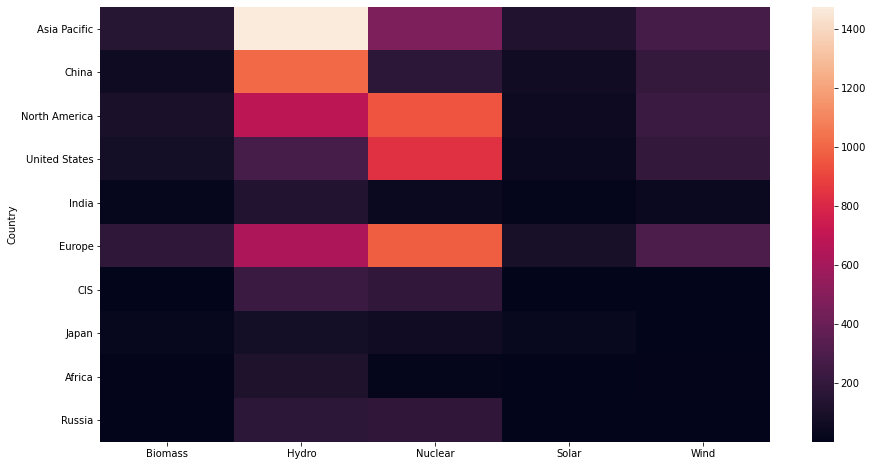

In [29]:
fig, ax = pyplot.subplots(figsize=(15,8))
ax = sns.heatmap(energy_grouped.iloc[:,2:7].head(10))

# How are evolving Coal consumption and Solar productionover the years ?
## For visual purposes we will only work on 3 country

In [30]:
ebc_light = energy_co2_death_green[(energy_co2_death_green.Country == 'Iceland') | (energy_co2_death_green.Country == 'France') | (energy_co2_death_green.Country == 'Australia')]
ebc_light.head()

,Country,Year,Coal,Gas,Biomass,Hydro,Nuclear,Solar,Wind,Oil,CO2,Population,PM2.5,Deaths,%RenewableElectricity
40,Australia,2010,2.186381,1.216211,2.441550,13.746,0.0,0.977648,4.985,1.818086,406.425942,22155000.0,5.937561,13.140380,8.598495
41,Australia,2011,2.131171,1.270191,2.573950,19.572,0.0,2.044547,6.432,1.936222,404.263695,22538000.0,5.880919,13.276676,10.355690
42,Australia,2012,1.995833,1.274064,3.097850,17.036,0.0,2.412000,7.725,2.011291,406.986985,22904000.0,5.981776,12.196401,10.492490
43,Australia,2013,1.894233,1.338245,3.331650,19.089,0.0,3.847400,9.259,2.047592,398.051591,23255000.0,6.028238,11.384154,13.122810
44,Australia,2014,1.878550,1.443597,3.546362,14.484,0.0,4.952000,9.777,2.069432,393.288532,23596000.0,5.933055,10.939491,14.598490


<AxesSubplot:label='4b3a1b9b-f90c-470e-ab9a-469554684748', xlabel='Year', ylabel='Solar'>

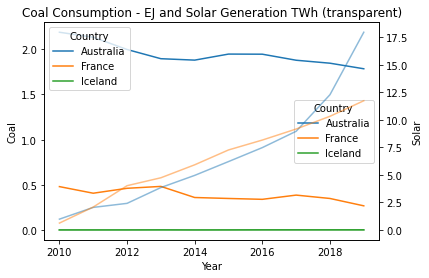

In [31]:
sns.lineplot(data=ebc_light, x="Year", y="Coal", hue="Country", color='g').set_title('Coal Consumption - EJ and Solar Generation TWh (transparent)')
ax2 = plt.twinx()
sns.lineplot(data=ebc_light, x="Year", y="Solar", hue="Country", color='b', alpha=0.5, ax=ax2)

# How are evolving CO2 emissions over the years ?
## For visual purposes we will only work on 3 country with the full dataset from ~1800 to 2019

In [226]:
co2_by_country_light = co2_by_country[(co2_by_country.Entity == 'Iceland') | (co2_by_country.Entity == 'France') | (co2_by_country.Entity == 'Australia')]
co2_by_country_light.head()

,Entity,Code,Year,Annual CO2 emissions
1531,Australia,AUS,1851,-0.062288
1532,Australia,AUS,1852,-0.054960
1533,Australia,AUS,1853,-0.109920
1534,Australia,AUS,1854,-0.128240
1535,Australia,AUS,1855,-0.131904


Text(0.5, 1.0, 'Annual CO2 emissions by country')

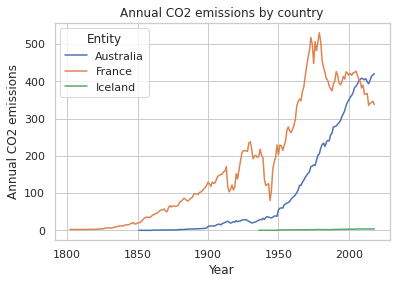

In [228]:
sns.lineplot(data=co2_by_country_light, x="Year", y="Annual CO2 emissions", hue="Entity").set_title('Annual CO2 emissions by country')

# Find the biggest Continents who are polluting

In [221]:
co2_grouped = co2_by_country.groupby(['Entity']).mean().drop(['Year'], axis=1).reset_index().sort_values(by='Annual CO2 emissions', ascending=False)
co2_grouped
# We must skip the first 5 rows which are not useful for our exercise as we want continents

,Entity,Annual CO2 emissions
114,KP Annex B,12721.770477
170,OECD,11192.793896
165,Non-OECD,10328.615514
164,Non KP Annex B,8799.638933
246,World,6014.242731
...,...,...
245,Wallis and Futuna Islands,0.025357
232,Tuvalu,0.009128
189,Saint Helena,0.009120
7,Antarctic Fisheries,0.007328


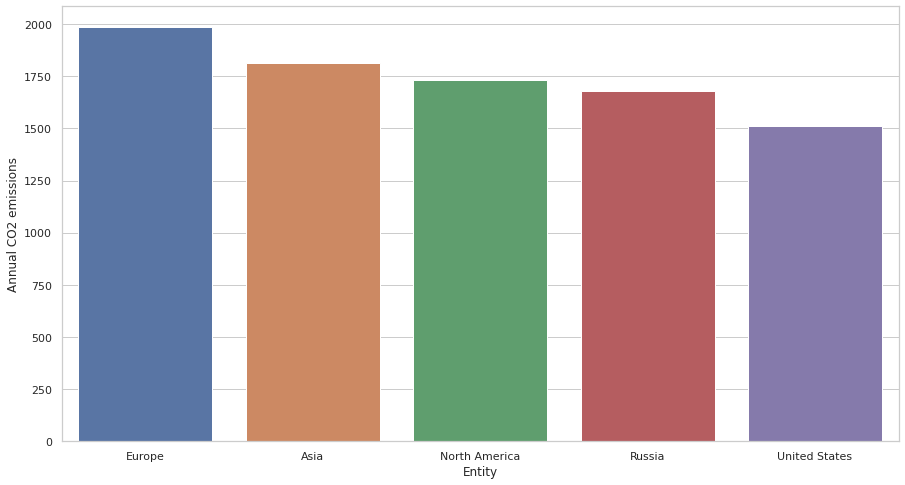

In [35]:
sns.set_theme(style="whitegrid")
fig, ax = pyplot.subplots(figsize=(15,8))
ax = sns.barplot(x="Entity", y="Annual CO2 emissions",data=co2_grouped.iloc[5:10]) # skipping the first 5 rows

In [36]:
pollution_by_country = pollution_by_region[(pollution_by_region.VAR == 'AIR_POL') & (pollution_by_region['Territory level and Typology'] == 'Country')]
pollution_by_country.head()

,TL,Territory level and Typology,REG_ID,Region,VAR,Indicator,POS,Position,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,1,Country,AUS,Australia,AIR_POL,Air Pollution in PM2.5 (average level in µg/m³...,ALL,All regions,2003,2003,NaN,NaN,0,Units,NaN,NaN,3.880,NaN,NaN
1,1,Country,AUS,Australia,AIR_POL,Air Pollution in PM2.5 (average level in µg/m³...,ALL,All regions,2006,2006,NaN,NaN,0,Units,NaN,NaN,3.301,NaN,NaN
4,1,Country,AUS,Australia,AIR_POL,Air Pollution in PM2.5 (average level in µg/m³...,ALL,All regions,2009,2009,NaN,NaN,0,Units,NaN,NaN,3.594,NaN,NaN
5,1,Country,AUS,Australia,AIR_POL,Air Pollution in PM2.5 (average level in µg/m³...,ALL,All regions,2012,2012,NaN,NaN,0,Units,NaN,NaN,7.000,NaN,NaN
54,1,Country,AUT,Austria,AIR_POL,Air Pollution in PM2.5 (average level in µg/m³...,ALL,All regions,2003,2003,NaN,NaN,0,Units,NaN,NaN,19.677,NaN,NaN


Text(0.5, 1.0, 'CO2 Emissions in ug/m3')

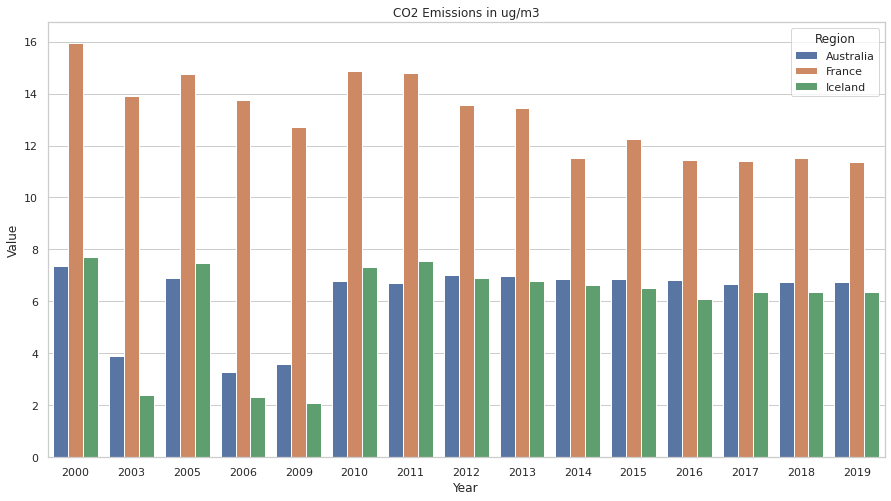

In [37]:
pollution_by_countrylight = pollution_by_country[(pollution_by_country.Region == 'Iceland') | (pollution_by_country.Region == 'France') | (pollution_by_country.Region == 'Australia')]
fig, ax = pyplot.subplots(figsize=(15,8))
sns.barplot(data=pollution_by_countrylight, x="Year", y="Value", hue="Region").set_title('CO2 Emissions in ug/m3')

In [38]:
deaths_grouped = deaths_by_particle_vs_pm25.drop(['Continent','Year'], axis=1).groupby('Entity').mean().dropna().reset_index()
deaths_grouped

,Entity,"Total population (Gapminder, HYDE & UN)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",Deaths - Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate)
0,Afghanistan,8.546004e+06,53.546737,45.979634
1,Albania,1.283899e+06,15.058675,22.319736
2,Algeria,1.038665e+07,31.712808,50.522883
3,American Samoa,3.978571e+04,3.809215,37.743906
4,Andorra,1.713222e+04,11.110804,18.356823
...,...,...,...,...
190,Vietnam,2.776956e+07,27.260872,28.866898
191,World,3.004868e+09,42.944725,42.369640
192,Yemen,6.072310e+06,57.460539,44.368401
193,Zambia,3.088306e+06,29.031042,24.739512


[Text(0, 0.5, 'Total Pollution Deaths VS PM25 Deaths')]

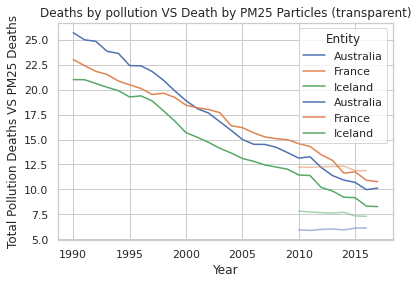

In [267]:
dbppm25 = deaths_by_particle_vs_pm25[(deaths_by_particle_vs_pm25.Entity == 'Iceland') | (deaths_by_particle_vs_pm25.Entity == 'France') | (deaths_by_particle_vs_pm25.Entity == 'Australia')]
ax = sns.lineplot(data=dbppm25, x="Year", y="Deaths - Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate)", hue="Entity").set_title('Deaths by pollution VS Death by PM25 Particles (transparent)')
ax = sns.lineplot(data=dbppm25, x="Year", y="PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)", hue="Entity", alpha=0.5)
ax.set(ylabel='Total Pollution Deaths VS PM25 Deaths')

No handles with labels found to put in legend.


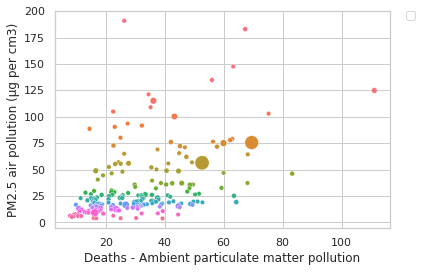

In [40]:
pm25Vdeath = deaths_by_particle_vs_pm25.sort_values(by=['PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'], ascending=False).dropna().head(None)
pm25Vdeath = pm25Vdeath[pm25Vdeath.Year.between(2010,2020,inclusive=True)]
pm25Vdeath = pm25Vdeath.rename(columns={"Deaths - Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate)":"Deaths - Ambient particulate matter pollution"})
pm25Vdeath = pm25Vdeath.rename(columns={"Total population (Gapminder, HYDE & UN)":"Total population"})
pm25Vdeath = pm25Vdeath.rename(columns={"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)": "PM2.5 air pollution (μg per cm3)"})

sns.scatterplot(
    data=pm25Vdeath, x="Deaths - Ambient particulate matter pollution", y="PM2.5 air pollution (μg per cm3)", hue="Entity", size="Total population",
    sizes=(20, 200), legend=False
)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [41]:
pm25Vdeath.sort_values(by=['PM2.5 air pollution (μg per cm3)'], ascending=False)

,Entity,Code,Year,Total population,Continent,PM2.5 air pollution (μg per cm3),Deaths - Ambient particulate matter pollution
30820,Niger,NER,2015,20002000.0,Africa,190.884126,26.257089
37241,Saudi Arabia,SAU,2015,31718000.0,Asia,182.921456,67.274180
34689,Qatar,QAT,2015,2566000.0,Asia,147.535340,63.209003
7334,Cameroon,CMR,2015,23298000.0,Africa,134.793750,55.991541
12776,Egypt,EGY,2015,92443000.0,Africa,124.875127,111.062806
...,...,...,...,...,...,...,...
16494,Greenland,GRL,2015,56000.0,North America,4.119724,30.296216
21959,Kiribati,KIR,2015,111000.0,Oceania,4.050094,15.872468
43579,Tonga,TON,2015,101000.0,Oceania,4.016893,25.023758
36581,Samoa,WSM,2015,194000.0,Oceania,3.851702,16.740490


In [42]:
pm25Vdeath.sort_values(by=['Deaths - Ambient particulate matter pollution'], ascending=False)

,Entity,Code,Year,Total population,Continent,PM2.5 air pollution (μg per cm3),Deaths - Ambient particulate matter pollution
12776,Egypt,EGY,2015,9.244300e+07,Africa,124.875127,111.062806
46404,Uzbekistan,UZB,2015,3.093000e+07,Asia,46.213010,83.218565
45441,United Arab Emirates,ARE,2015,9.263000e+06,Asia,102.926240,75.215920
19248,India,IND,2015,1.310152e+09,Asia,75.582857,69.485160
23925,Libya,LBY,2015,6.418000e+06,Africa,64.425729,68.159076
...,...,...,...,...,...,...,...
31800,Norway,NOR,2015,5.200000e+06,Europe,7.913174,9.710341
19028,Iceland,ISL,2015,3.300000e+05,Europe,7.328428,9.169528
30380,New Zealand,NZL,2015,4.615000e+06,Oceania,5.533858,9.040563
41518,Sweden,SWE,2015,9.765000e+06,Europe,5.222488,8.477785


In [43]:
green_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160569 entries, 0 to 160568
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   COU                    160569 non-null  object 
 1   Country                160569 non-null  object 
 2   VAR                    160569 non-null  object 
 3   Variable               160569 non-null  object 
 4   YEA                    160569 non-null  int64  
 5   Year                   160569 non-null  int64  
 6   Unit Code              160569 non-null  object 
 7   Unit                   160569 non-null  object 
 8   PowerCode Code         160569 non-null  int64  
 9   PowerCode              160569 non-null  object 
 10  Reference Period Code  22554 non-null   object 
 11  Reference Period       22554 non-null   object 
 12  Value                  160568 non-null  float64
 13  Flag Codes             26212 non-null   object 
 14  Flags                  26212 non-nul

In [44]:
#green_indicators.Variable.unique()
green_indicators.Unit.unique()

array(['US dollars per kilogram', 'Tonnes', 'US Dollar',
       'Tonnes of oil equivalent (toe)', 'Percentage',
       'Cubic metres per capita', 'Number', 'Inhabitants', 'Ratio',
       'US dollars per litre', 'Index', 'Kilograms per capita',
       'Percentage points', 'Micrograms per cubic metre',
       'Per 1 000 000 inhabitants', 'Kilograms', 'Cubic metres',
       'Square metres', 'Children', 'Years', 'Per 1 000 inhabitants',
       'Square kilometres'], dtype=object)

In [45]:
percent_renewable_energy_supply = green_indicators[green_indicators.Variable == 'Renewable energy supply, % total energy supply']
percent_renewable_energy_supply.sort_values('Value', ascending=False)

,COU,Country,VAR,Variable,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
42137,PRY,Paraguay,RE_TPES,"Renewable energy supply, % total energy supply",2000,2000,PC,Percentage,0,Units,NaN,NaN,177.1503,NaN,NaN
42138,PRY,Paraguay,RE_TPES,"Renewable energy supply, % total energy supply",2005,2005,PC,Percentage,0,Units,NaN,NaN,165.8764,NaN,NaN
42136,PRY,Paraguay,RE_TPES,"Renewable energy supply, % total energy supply",1995,1995,PC,Percentage,0,Units,NaN,NaN,153.4931,NaN,NaN
42141,PRY,Paraguay,RE_TPES,"Renewable energy supply, % total energy supply",2012,2012,PC,Percentage,0,Units,NaN,NaN,149.7069,NaN,NaN
42135,PRY,Paraguay,RE_TPES,"Renewable energy supply, % total energy supply",1990,1990,PC,Percentage,0,Units,NaN,NaN,148.5519,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43124,ARE,United Arab Emirates,RE_TPES,"Renewable energy supply, % total energy supply",1990,1990,PC,Percentage,0,Units,NaN,NaN,0.0000,NaN,NaN
44290,BHR,Bahrain,RE_TPES,"Renewable energy supply, % total energy supply",1990,1990,PC,Percentage,0,Units,NaN,NaN,0.0000,NaN,NaN
44291,BHR,Bahrain,RE_TPES,"Renewable energy supply, % total energy supply",1995,1995,PC,Percentage,0,Units,NaN,NaN,0.0000,NaN,NaN
44292,BHR,Bahrain,RE_TPES,"Renewable energy supply, % total energy supply",2000,2000,PC,Percentage,0,Units,NaN,NaN,0.0000,NaN,NaN


Text(0.5, 1.0, '% Renewable energy by country')

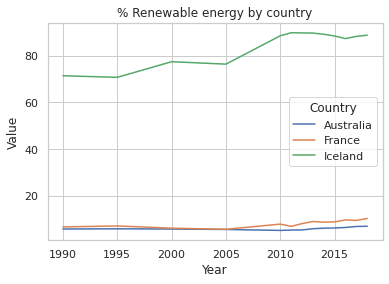

In [46]:
renewable = percent_renewable_energy_supply[(percent_renewable_energy_supply.Country == 'Iceland') | (percent_renewable_energy_supply.Country == 'France') | (percent_renewable_energy_supply.Country == 'Australia')]
sns.lineplot(data=renewable, x="Year", y="Value", hue="Country").set_title('% Renewable energy by country')


In [47]:
mean_percent = percent_renewable_energy_supply.groupby('Country').mean().sort_values('Value', ascending = False).drop(['YEA','Year','PowerCode Code'], axis = 1)
mean_percent

,Value
Country,
Paraguay,142.283754
Democratic Republic of the Congo,96.177789
Ethiopia,93.494862
Zambia,89.908198
Mozambique,89.382563
...,...
Kuwait,0.009431
Saudi Arabia,0.007488
Qatar,0.000000


<AxesSubplot:ylabel='Count'>

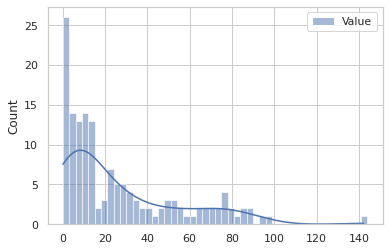

In [48]:
sns.histplot(data=mean_percent, binwidth=3, kde=True)

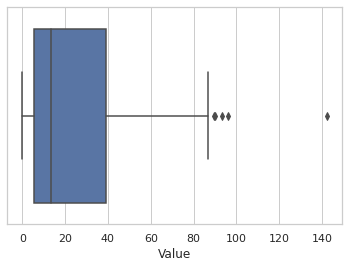

In [49]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=mean_percent.Value)

Text(0.5, 1.0, 'Premature mortalities by pm25 cost')

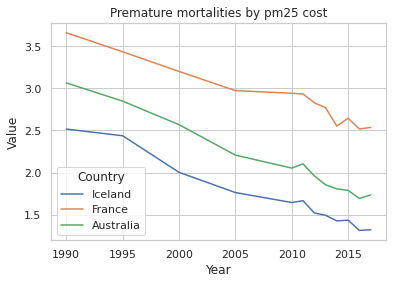

In [50]:
df = green_indicators[green_indicators.Variable == 'Welfare costs of premature mortalities from exposure to ambient PM2.5, GDP equivalent']
premature_mortalities_pm25 = df[(df.Country == 'Iceland') | (df.Country == 'France') | (df.Country == 'Australia')]
sns.lineplot(data=premature_mortalities_pm25, x="Year", y="Value", hue="Country").set_title('Premature mortalities by pm25 cost')

# Fossil fuel prices evolution over the years

In [270]:
fossil_fuel_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Year                                                       31 non-null     int64  
 1   Crude Oil/US dollars per barrel                            31 non-null     float64
 2   Natural Gas (Henry Hub)/US dollars per million Btu         31 non-null     float64
 3   Coal (Northwest Europe Marker Price)/US dollars per tonne  31 non-null     float64
 4   Unnamed: 4                                                 0 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 1.3 KB


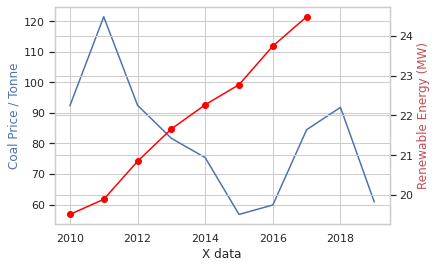

In [275]:
fossil_fuel_prices_2010to2019 = fossil_fuel_prices[fossil_fuel_prices.Year.between(2010,2020)]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(fossil_fuel_prices_2010to2019.Year, fossil_fuel_prices_2010to2019['Coal (Northwest Europe Marker Price)/US dollars per tonne'])
ax2.plot(fossil_fuel_prices_2010to2019.Year, energy_co2_death_green[energy_co2_death_green.Country == 'World']['%RenewableElectricity'], 'o-', color="red" )

ax1.set_xlabel('X data')
ax1.set_ylabel('Coal Price / Tonne', color='b')
ax2.set_ylabel('Renewable Energy (MW)', color='r')

plt.show()